<p style="font-size:260%;">Sky patches</p>

# Imports and functions

## Imports

In [1]:
# import pysm3 as pysm
# from qubic import QubicSkySim as qss
# import qubic
# import pysm3 as pysm
import qubic
import pylab as pl
import numpy as np
import os
import sys
import time
import pickle
import healpy as hp
from importlib import reload
import qubic_functions as qf
from astropy import units as u
from astropy.coordinates import SkyCoord
from matplotlib import cm
import matplotlib
import astropy

In [2]:
from qubic import QubicSampling

# Relevant folders and files

In [3]:
# Sky map
nb_sky_map_file = '/home/daniele/Documents/QUBIC/data_analysis/TD_argentina/maps/skymap.pickle'

In [7]:
# Coverage maps
nb_qubic_patch_file = \
'/home/daniele/Documents/QUBIC/papers/qubic_and_dust_decorrelation/workfiles/CircularSkyPatch_RA0_DEC-57.fits'
nb_alt_patch_file = \
'/home/daniele/Documents/QUBIC/papers/qubic_and_dust_decorrelation/workfiles/CircularSkyPatch_RA-30_DEC-30.fits'
nb_s4_patch_file = \
'/home/daniele/Documents/QUBIC/papers/qubic_and_dust_decorrelation/workfiles/CircularSkyPatch_RA0_DEC-45.fits'


In [12]:
# Color maps
nb_root_folder = '/home/daniele/Documents/QUBIC/data_analysis/TD_argentina/scanning_strategy_analysis/'
nb_colormaps_folder = '%s%s' % (nb_root_folder, 'colormaps/')
nb_planck_cmap_file = '%s%s' % (nb_colormaps_folder, 'planck_colormap.txt')
nb_planck_cmap = matplotlib.colors.ListedColormap(np.loadtxt(nb_planck_cmap_file)/255.)

# Read maps

In [5]:
nb_fid = open(nb_sky_map_file,'rb')
nb_sky_map = pickle.load(nb_fid)

In [37]:
nb_qubic_patch = hp.read_map(nb_qubic_patch_file)
nb_zerovals = np.where(nb_qubic_patch == 0)[0]
nb_qubic_patch[nb_zerovals] = hp.UNSEEN

nb_s4_patch   = hp.read_map(nb_s4_patch_file)
nb_zerovals = np.where(nb_s4_patch == 0)[0]
nb_one_vals = np.where(nb_s4_patch == 1)[0]
nb_s4_patch[nb_zerovals] = hp.UNSEEN
nb_s4_patch[nb_one_vals] = 1

# nb_patches = nb_qubic_patch.copy()
nb_patches = nb_qubic_patch + nb_s4_patch
# nb_patches[nb_one_vals] = 3

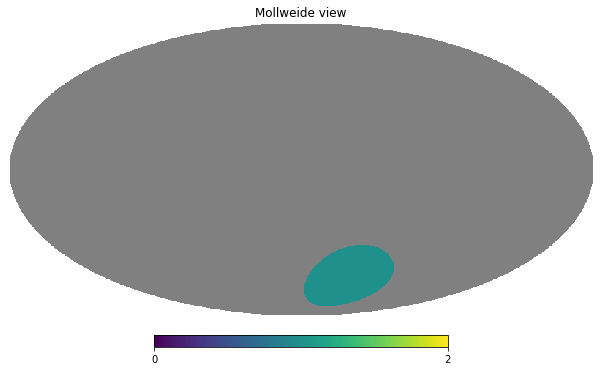

In [39]:
hp.mollview(nb_qubic_patch)

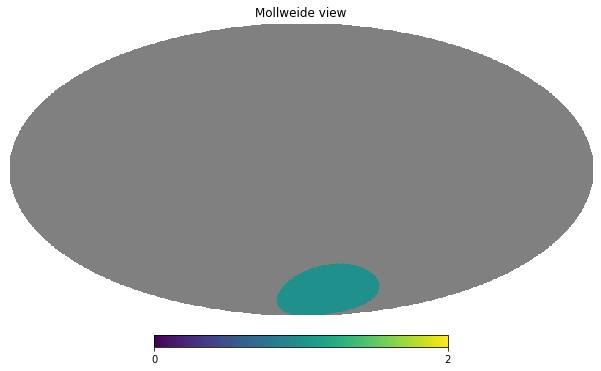

In [14]:
hp.mollview(nb_s4_patch)

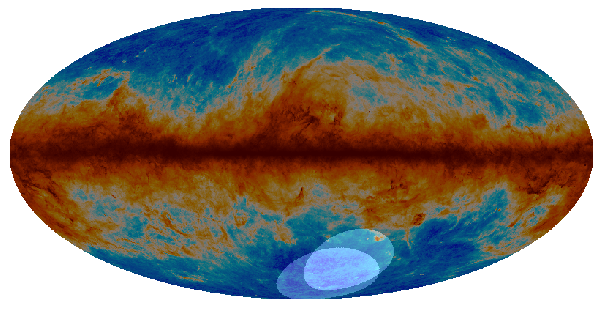

In [38]:
nb_alpha = np.array([.5 for i in np.arange(12*256**2)])
nb_alpha1 = np.array([.7 for i in np.arange(12*256**2)])

# Plot coverage over sky map
nb_map_title = 'Coverage of left region over sky map' 
hp.mollview(np.transpose(nb_sky_map[7])[0], fig = 0, title = '',unit = '$\mu$K', norm = 'hist',\
               cmap = nb_planck_cmap, cbar = None)
hp.mollview(nb_patches, fig = 0,\
            unit = '$\mu$K', title = '', alpha = nb_alpha, cmap = cm.hot, cbar = None)
# hp.mollview(nb_qubic_patch, fig = 0,\
#             unit = '$\mu$K', title = '', alpha = nb_alpha1, cmap = cm.hot, cbar = None)
pl.savefig('sky_patches.pdf')


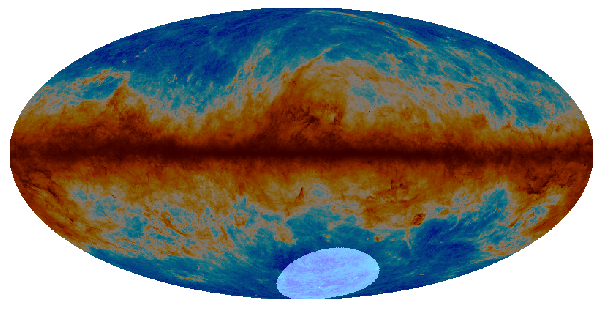

In [44]:
nb_alpha = np.array([.5 for i in np.arange(12*256**2)])
nb_alpha1 = np.array([.7 for i in np.arange(12*256**2)])

# Plot coverage over sky map
hp.mollview(np.transpose(nb_sky_map[7])[0], fig = 0, title = '',unit = '$\mu$K', norm = 'hist',\
               cmap = nb_planck_cmap, cbar = None)
hp.mollview(2*nb_s4_patch, fig = 0,\
            unit = '$\mu$K', title = '', alpha = nb_alpha, cmap = cm.hot, cbar = None)
# hp.mollview(nb_qubic_patch, fig = 0,\
#             unit = '$\mu$K', title = '', alpha = nb_alpha1, cmap = cm.hot, cbar = None)
pl.savefig('s4_patch.pdf')


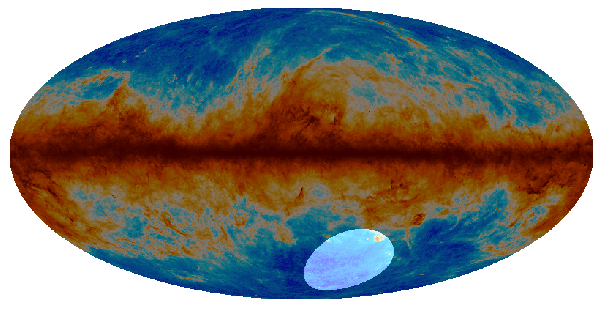

In [45]:
nb_alpha = np.array([.5 for i in np.arange(12*256**2)])
nb_alpha1 = np.array([.7 for i in np.arange(12*256**2)])

# Plot coverage over sky map
hp.mollview(np.transpose(nb_sky_map[7])[0], fig = 0, title = '',unit = '$\mu$K', norm = 'hist',\
               cmap = nb_planck_cmap, cbar = None)
hp.mollview(2*nb_qubic_patch, fig = 0,\
            unit = '$\mu$K', title = '', alpha = nb_alpha, cmap = cm.hot, cbar = None)
# hp.mollview(nb_qubic_patch, fig = 0,\
#             unit = '$\mu$K', title = '', alpha = nb_alpha1, cmap = cm.hot, cbar = None)
pl.savefig('qubic_patch.pdf')
